In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pennylane as qml

In [2]:
n_cells = (3, 3)
coupling = [1,1,1]

qubits = n_cells[0] * n_cells[1]

lattice = 'triangle'

H = qml.spin.heisenberg(lattice, n_cells, coupling, boundary_condition=True)

In [ ]:
eigenvalues = np.linalg.eigvalsh(H.matrix())
eigenvalues[0]

np.float64(-21.00000000000004)

## Load data

In [5]:
loc = "../local_data/log4"
types = 'cnot'

In [6]:
energies_hee = np.load(loc + '/energies_' + types + '_1.npy')
convergences_hee = np.load(loc + '/convergences_' + types + '_1.npy')
grads_hee = np.load(loc + '/grad_norms_' + types + '_1.npy')
grad_variances_hee = np.load(loc + '/grad_variances_' + types + '_1.npy')

In [7]:
energies_ng = np.load(loc + '/energies_' + types + '_2.npy')
convergences_ng = np.load(loc + '/convergences_' + types + '_2.npy')
grads_ng = np.load(loc + '/grad_norms_' + types + '_2.npy')
grad_variances_ng = np.load(loc + '/grad_variances_' + types + '_2.npy')

In [8]:
energies_ng.shape

(7, 400, 151)

## Plots


In [9]:
mean_loss_hee = np.mean(energies_hee, axis=1)
mean_loss_ng = np.mean(energies_ng, axis=1)

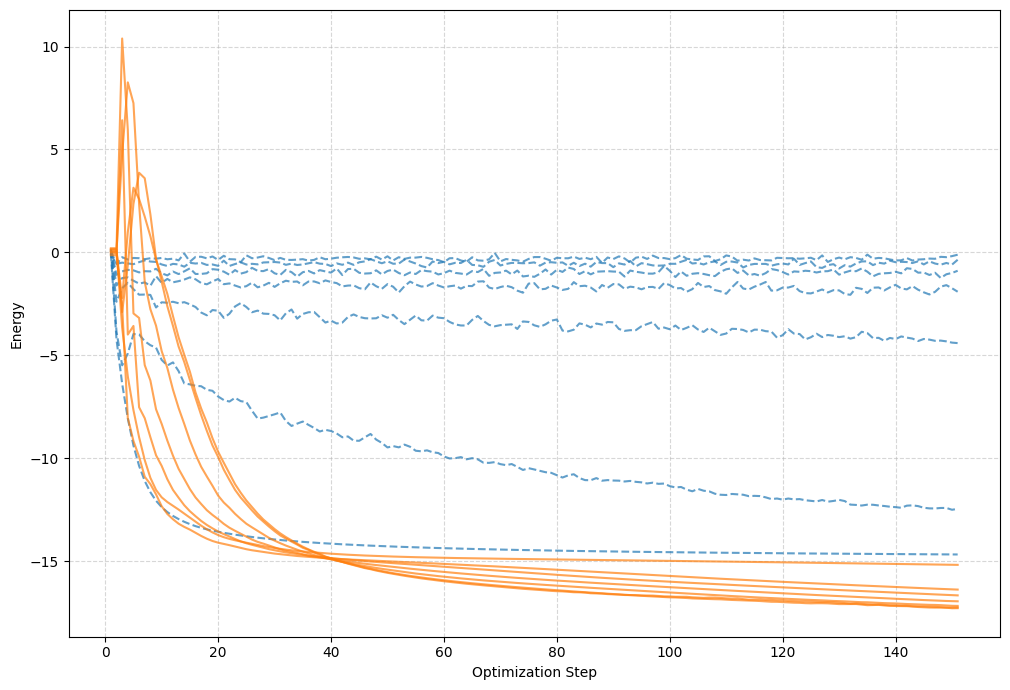

In [10]:
# --- Plotting Code ---
plt.figure(figsize=(12, 7)) # Increased figure width to accommodate the legend

steps = np.arange(1, mean_loss_hee.shape[1] + 1)

# Loop to plot and label each 'Hardware Efficient' line
for i, variance_curve in enumerate(mean_loss_hee):
    # The label is now unique for each line (e.g., 'HE Run 1', 'HE Run 2')
    plt.plot(steps, variance_curve, linestyle='--', color='C0', alpha=0.7, 
             label=f'Hardware Efficient w/ L={2*(i+1)}')

# Loop to plot and label each 'QResNet' line
for i, variance_curve in enumerate(mean_loss_ng):
    plt.plot(steps, variance_curve, linestyle='-', color='C1', alpha=0.7, 
             label=f'QResNet w/ L={2*(i+1)}')

plt.xlabel('Optimization Step')
plt.ylabel('Energy')
plt.grid(True, which="both", ls="--", alpha=0.5)

# --- Legend Management ---
# Place the legend outside the plot area to the right to avoid clutter
#plt.legend(title='Individual Runs', bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust plot layout to make room for the external legend
plt.tight_layout(rect=[0, 0, 0.85, 1]) 

plt.show()

In [11]:
layers = np.arange(2, 27, 4)

In [12]:
min_hee = np.min(energies_hee[:,:,-1], axis=1)
min_ng = np.min(energies_ng[:,:,-1], axis=1)

In [13]:
min_hee

tensor([-14.93132863, -14.55680156, -12.65998301,  -9.32304045,
         -7.65333733,  -5.11161851,  -4.63814359], requires_grad=True)

In [14]:
min_ng

tensor([-15.78190613, -17.14634514, -17.41396904, -17.63921928,
        -17.71804619, -17.838377  , -17.92324638], requires_grad=True)

In [15]:
min_ng[-1]/9

tensor(-1.99147182, requires_grad=True)

In [16]:
min_hee[-1]/9

tensor(-0.51534929, requires_grad=True)

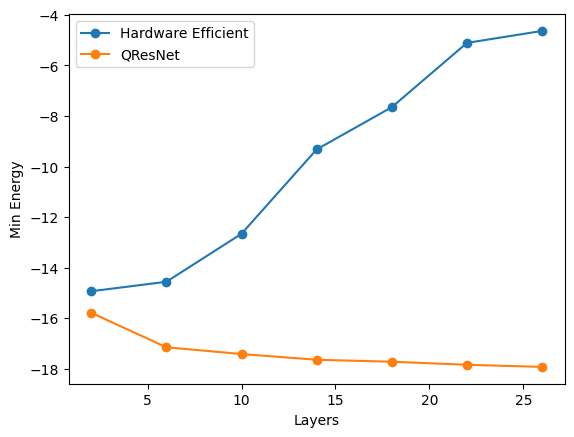

In [17]:
plt.plot(layers, min_hee, marker='o', label='Hardware Efficient')
plt.plot(layers, min_ng, marker='o', label='QResNet')
plt.xlabel('Layers')
plt.ylabel('Min Energy')
plt.legend()
plt.show()

In [18]:
median_hee = np.median(energies_hee, axis=1)[:,-1]
median_ng = np.median(energies_ng, axis=1)[:,-1]

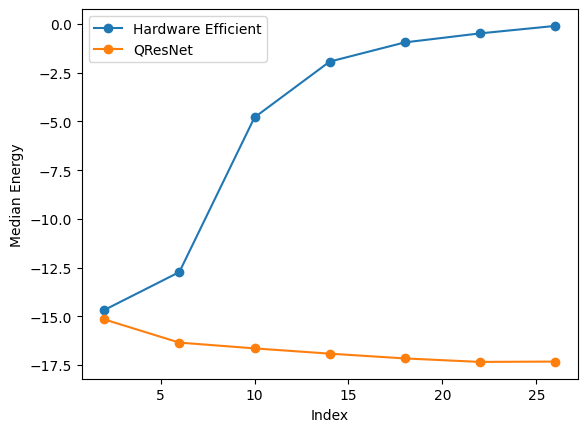

In [19]:
plt.plot(layers, median_hee, marker='o', label='Hardware Efficient')
plt.plot(layers, median_ng, marker='o', label='QResNet')
plt.xlabel('Index')
plt.ylabel('Median Energy')
plt.legend()
plt.show()

In [20]:
mean_var_hee = np.mean(grad_variances_hee, axis=1)
mean_var_ng = np.mean(grad_variances_ng, axis=1)

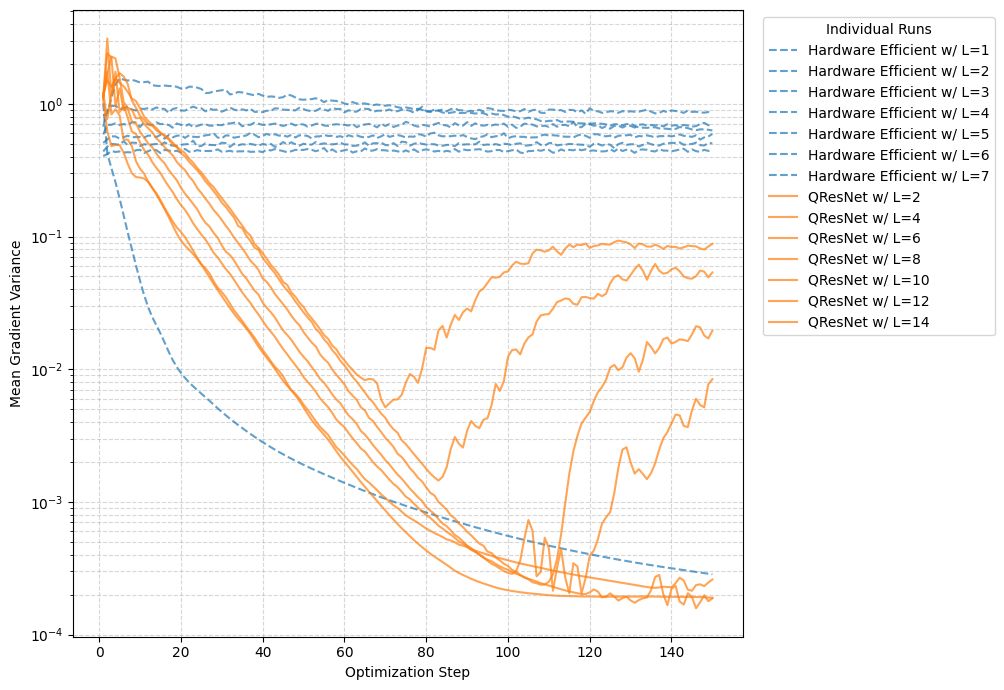

In [21]:
# --- Plotting Code ---
plt.figure(figsize=(12, 7)) # Increased figure width to accommodate the legend

steps = np.arange(1, mean_var_hee.shape[1] + 1)

# Loop to plot and label each 'Hardware Efficient' line
for i, variance_curve in enumerate(mean_var_hee):
    # The label is now unique for each line (e.g., 'HE Run 1', 'HE Run 2')
    plt.plot(steps, variance_curve, linestyle='--', color='C0', alpha=0.7, 
             label=f'Hardware Efficient w/ L={i+1}')

# Loop to plot and label each 'QResNet' line
for i, variance_curve in enumerate(mean_var_ng):
    plt.plot(steps, variance_curve, linestyle='-', color='C1', alpha=0.7, 
             label=f'QResNet w/ L={2*(i+1)}')

plt.yscale('log')
plt.xlabel('Optimization Step')
plt.ylabel('Mean Gradient Variance')
plt.grid(True, which="both", ls="--", alpha=0.5)

# --- Legend Management ---
# Place the legend outside the plot area to the right to avoid clutter
plt.legend(title='Individual Runs', bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust plot layout to make room for the external legend
plt.tight_layout(rect=[0, 0, 0.85, 1]) 

plt.show()

(array([ 9., 37., 49., 51., 65., 44., 38., 45., 15., 14.,  9.,  8.,  6.,
         4.,  1.,  1.,  0.,  3.,  0.,  1.]),
 array([-17.92324638, -17.79751172, -17.67177706, -17.54604239,
        -17.42030773, -17.29457307, -17.16883841, -17.04310374,
        -16.91736908, -16.79163442, -16.66589975, -16.54016509,
        -16.41443043, -16.28869576, -16.1629611 , -16.03722644,
        -15.91149178, -15.78575711, -15.66002245, -15.53428779,
        -15.40855312]),
 <BarContainer object of 20 artists>)

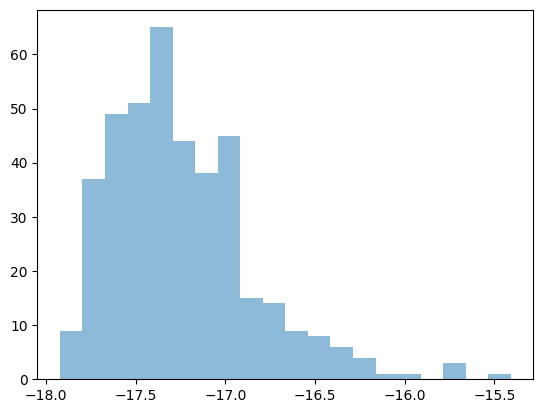

In [23]:
plt.hist(energies_ng[-1, :, -1], bins=20, alpha=0.5, label='Hardware Efficient')